In [12]:
from urllib.request import urlopen
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import time
import yfinance as yf


In [8]:
def getWeatherData(location, hourly, period, timezone="auto", tempUnit="C"):
    # store the URL in url as parameter for urlopen
    today = datetime.datetime.today()
    print(today)
    sv = period[0].split("-")
    startDate = datetime.datetime(int(sv[0]), int(sv[1]), int(sv[2])+1)
    print(startDate)
    if startDate < today:
        url = "https://archive-api.open-meteo.com/v1/archive?"
    else:
        url = "https://api.open-meteo.com/v1/forecast?"

    # add location parameter
    if location[0][-1]=="N":
        url += f"latitude={location[0][:-1]}"
    else:
        url += f"latitude=-{location[0][:-1]}"
    if location[1][-1] == "E":
        url += f"&longitude={location[1][:-1]}"
    else:
        url += f"&longitude=-{location[1][:-1]}"

    # add temperature unit
    if tempUnit == "F":
        url += f"&temperature_unit=fahrenheit"

    # add period parameter
    url += f"&start_date={period[0]}&end_date={period[1]}"
   
    # add hourly parameter
    url += f"&hourly={hourly}"

    # add time zone
    url += f"&timezone={timezone}"

    print(url)
    # get data from url
    # url = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m&start_date=2023-03-10&end_date=2023-03-10"
    print(url)
    response = urlopen(url)
    weatherData_json = json.loads(response.read())

    # print the json response
    print(weatherData_json)

    return weatherData_json

newYork = ("40.71N", "74.01W")
chicago = ("41.878N", "87.6298W")
hourly = "temperature_2m"
daily = None
period = ("2023-03-10", "2023-03-10")
timezone = "EST"
weatherData = getWeatherData(newYork, hourly, period, timezone, tempUnit = "F")


2023-03-10 14:51:19.516131
2023-03-11 00:00:00
https://api.open-meteo.com/v1/forecast?latitude=40.71&longitude=-74.01&temperature_unit=fahrenheit&start_date=2023-03-10&end_date=2023-03-10&hourly=temperature_2m&timezone=EST
https://api.open-meteo.com/v1/forecast?latitude=40.71&longitude=-74.01&temperature_unit=fahrenheit&start_date=2023-03-10&end_date=2023-03-10&hourly=temperature_2m&timezone=EST
{'latitude': 40.710335, 'longitude': -73.99307, 'generationtime_ms': 0.35202503204345703, 'utc_offset_seconds': -18000, 'timezone': 'America/New_York', 'timezone_abbreviation': 'EST', 'elevation': 27.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°F'}, 'hourly': {'time': ['2023-03-10T00:00', '2023-03-10T01:00', '2023-03-10T02:00', '2023-03-10T03:00', '2023-03-10T04:00', '2023-03-10T05:00', '2023-03-10T06:00', '2023-03-10T07:00', '2023-03-10T08:00', '2023-03-10T09:00', '2023-03-10T10:00', '2023-03-10T11:00', '2023-03-10T12:00', '2023-03-10T13:00', '2023-03-10T14:00', '2023-03-10T15:00

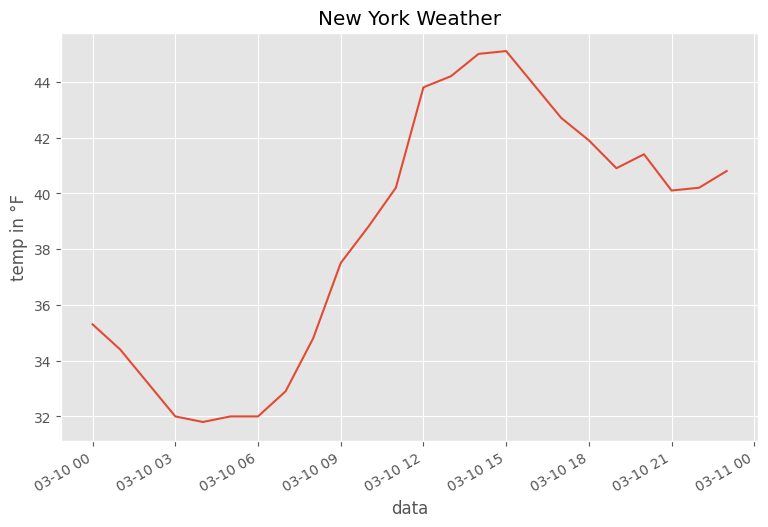

In [9]:
# times = weatherData_json["hourly"]["time"][9:17]
# temps = weatherData_json["hourly"]["temperature_2m"][9:17]
times = weatherData["hourly"]["time"]
times = np.asarray(times, dtype='datetime64[s]')
temps = weatherData["hourly"]["temperature_2m"]
# print(times)



fig = plt.figure("weather data test",
                 figsize=(9, 6))
plt1 = fig.add_subplot(111)
plt1.title.set_text("New York Weather")
plt.xlabel('data')
plt.ylabel(f'temp in {weatherData["hourly_units"]["temperature_2m"]}')

plt.plot(times, temps)
plt.style.use('ggplot')

fig.autofmt_xdate()

plt.show()



In [11]:
def getData(stockName, start, end):
    stock = yf.Ticker(stockName)
    hist = stock.history(start=start, end=end)

    df = yf.download(stockName, start=start, end=end)

    print(df.head())

    print(hist)

    # dates = pd.to_datetime(hist.index, format='%Y-%m-%d %H:%M:%S.%f')
    # hist.set_index(dates,inplace=True)

    # print(hist)
    return hist


def displayStock(data, ticker):
    hist = data

    histNP = hist.to_numpy()
    # to get columns
    histNP = np.transpose(histNP)
    open = histNP[0]
    high = histNP[1]
    low = histNP[2]
    close = histNP[3]

    # print(histNP)
    plt.style.use('fivethirtyeight')
    fig = plt.figure(f"{ticker} stock price", figsize=(10, 4))
    plt1 = fig.add_subplot(111)
    plt1.title.set_text("stock price")
    plt1.plot(hist.index, open, color="yellow", label="open")
    plt1.plot(hist.index, high, color="green", label="high")
    plt1.plot(hist.index, low, color="red", label="low")
    plt1.plot(hist.index, close, color="orange", label="close")
    plt1.legend(loc='upper left')
    fig.autofmt_xdate()
    plt.style.use('ggplot')
    plt.show()

ticker = "^GSPC"
# start = period[0]-
# end = period[1]
start = "1969-01-01"
end = "2010-01-01"
hist = getData(ticker, start, end)
hist.to_csv("SPX data.csv")

# displayStock(hist, ticker)


[*********************100%***********************]  1 of 1 completed
                           Open        High         Low       Close  \
Date                                                                  
1969-01-02 00:00:00-05:00   0.0  104.849998  103.209999  103.930000   
1969-01-03 00:00:00-05:00   0.0  104.870003  103.169998  103.989998   
1969-01-06 00:00:00-05:00   0.0  104.360001  101.940002  102.470001   
1969-01-07 00:00:00-05:00   0.0  102.680000  100.150002  101.220001   
1969-01-08 00:00:00-05:00   0.0  102.120003  100.139999  100.800003   

                            Adj Close    Volume  
Date                                             
1969-01-02 00:00:00-05:00  103.930000   9800000  
1969-01-03 00:00:00-05:00  103.989998  12750000  
1969-01-06 00:00:00-05:00  102.470001  12720000  
1969-01-07 00:00:00-05:00  101.220001  15740000  
1969-01-08 00:00:00-05:00  100.800003  13840000  
                                  Open         High          Low        Close  \
Da